## Invalid Sample Detection

In [3]:
from scipy import signal

import matplotlib.pyplot as plt
import numpy             as np
import wfdb
import scipy.fftpack
import scipy

%matplotlib inline

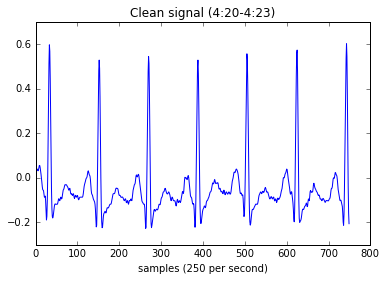

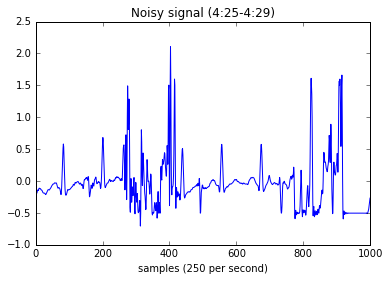

In [23]:
# There is a noisy section of this signal - between 4:20 and 4:25 (260 and 265 seconds)
sig, fields=wfdb.rdsamp('sampledata/a103l')
fs = 250
clean_signal = sig[260*fs:263*fs,:]
noisy_signal = sig[265*fs:269*fs,:]

plt.plot(clean_signal[:,0],'b-')
plt.title('Clean signal (4:20-4:23)')
plt.xlabel('samples (250 per second)')
plt.show()

plt.title('Noisy signal (4:25-4:29)')
plt.plot(noisy_signal[:,0],'b-')
plt.xlabel('samples (250 per second)')
plt.show()

To check if the signal amplitude in the range 70-90 Hz is outsize the limits (> 0.005 mV), we look at the fft of the signal:  

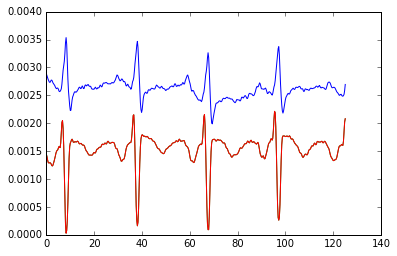

In [45]:
# Number of samplepoints
N = 1000
# sample spacing
T = 1.0 / fs
x = np.linspace(0.0, N*T, N)
y = clean_signal
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N/2]))
plt.show()